# 📉 Spectral Analysis of Random Matrices: Wigner's Semicircle Law

**Notebook Update (2026):** Yacine  
**Original Project (2024):** Yacine, Octave & Roman  
**Affiliation:** Dual Degree Candidate - ENS de Lyon (Physics) & École des Ponts ParisTech (Applied Maths/CS)  
**Documentation:** [**Read the Original 2024 Project Report**](./Project_report.pdf)

---

###  Preface
This notebook, developed in **2026**, revisits and modernizes the code from a physics simulation project originally conducted in **2024** by Yacine, Octave, and Roman.
This noebook only contains a code generating each figure of [**the Original 2024 Project Report**](./Project_report.pdf)

###  Figure 1
The first figure is directly extracted rom the aticle[^1] which we used in 2024 and also cited as source [1] in the report.

### Figure 2
The second figure was created by another member. of the group and I don't have the code for it anymore.

### Imports and configuration

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from tqdm import tqdm
import warnings

# Configuration pour des plots haute résolution (Retina display)
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-v0_8-paper') 
warnings.filterwarnings('ignore')

### Main functions

In [8]:
def generate_gue_matrix(n: int) -> np.ndarray:
    """Generates a Hermitian matrix from the Gaussian Unitary Ensemble."""
    # Complex random matrix
    Z = np.random.randn(n, n) + 1j * np.random.randn(n, n)
    # Hermitisation
    H = (Z + Z.conj().T) / 2
    return H

def wigner_semicircle(x, R):
    """Theoretical PDF."""
    return (2 / (np.pi * R**2)) * np.sqrt(np.maximum(0, R**2 - x**2))

### Figure 3
* **Matrix Generation:** Random symmetric matrices of size $n$ **are generated** with Gaussian coefficients (Normal distribution).
* **Spectrum Calculation:** For each matrix, the set of eigenvalues **is calculated**. Since the empirical spectrum is discrete (a "Dirac comb"), it cannot be directly compared to the continuous theoretical curve.
* **Histogram Construction (Smoothing):** To address this, the eigenvalues **are grouped** into histogram bins. An error analysis **determines** that the **optimal bin width is of the order of $1/\sqrt{n}$** (corresponding to a precision $\alpha=1/2$), which **corresponds** to the specific width used for Figure 3.
* **Comparison:** The resulting histogram **is overlaid** with the theoretical semicircle probability density function to visualize the convergence.

Calcul en cours...


Calcul des spectres: 100%|██████████| 4/4 [00:14<00:00,  3.68s/it]


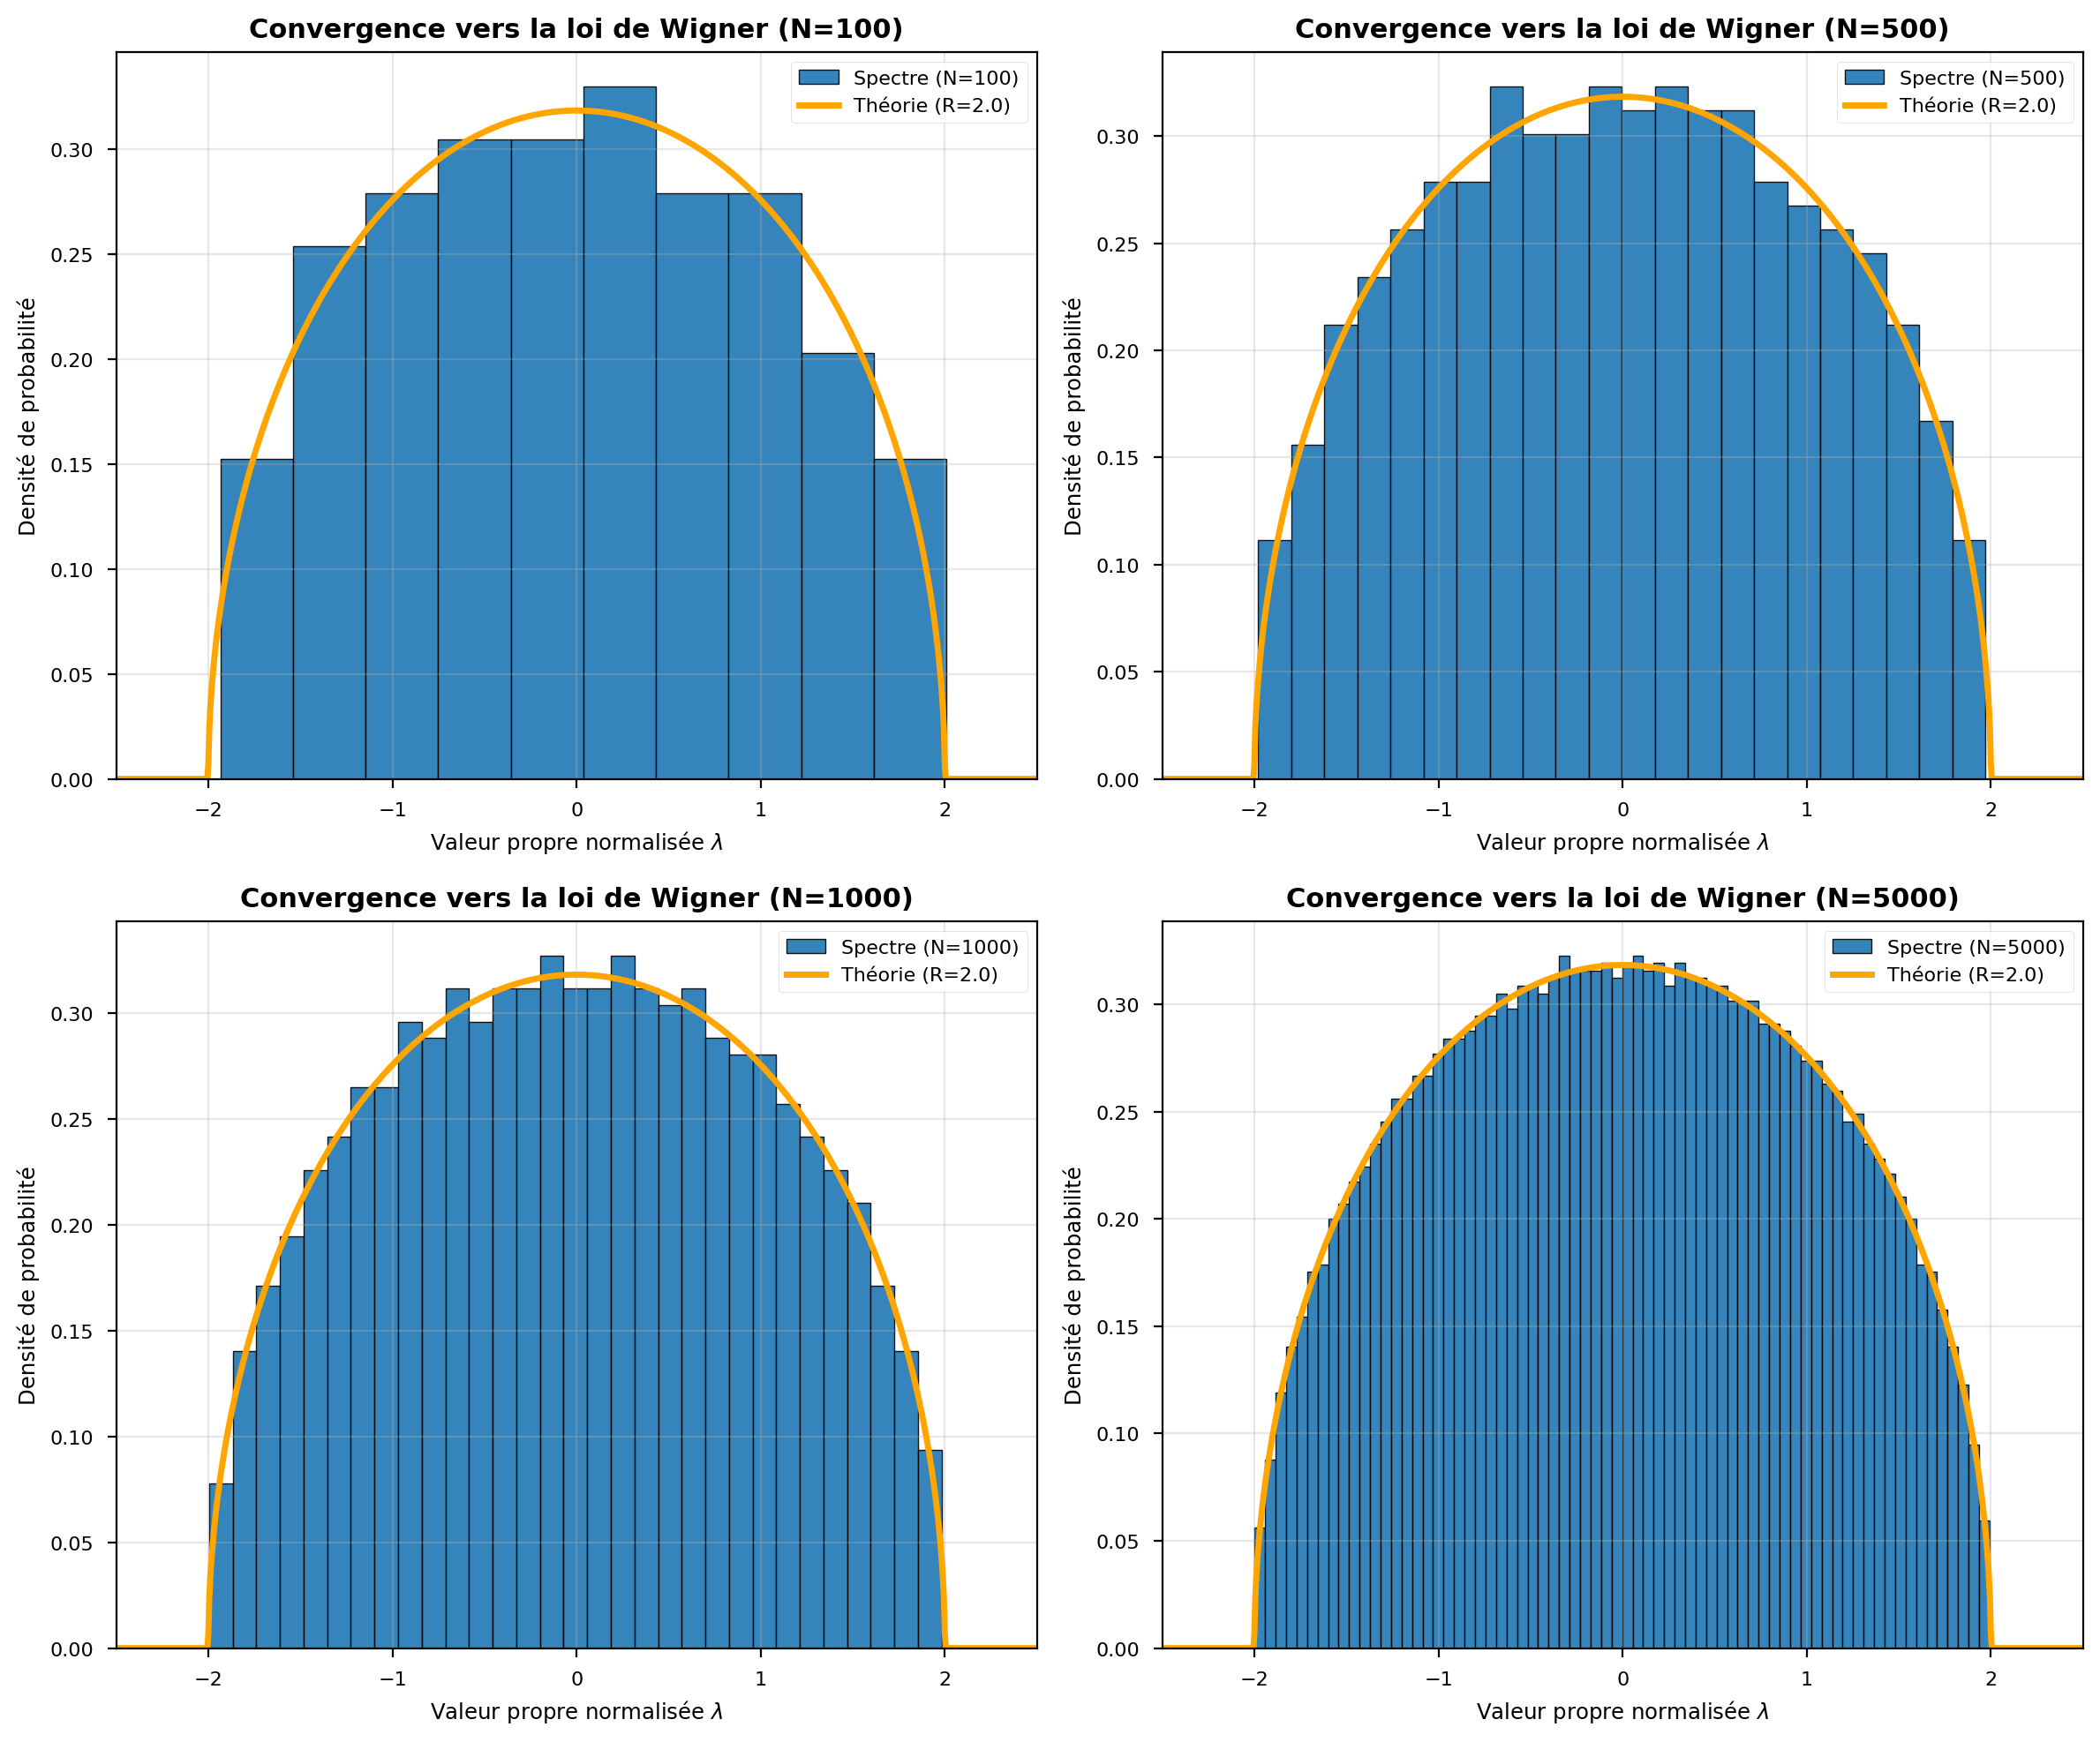

In [9]:
import numpy as np
import matplotlib.pyplot as plt

SIGMA = 1.0
RAYON_SPECTRAL = 2.0 * SIGMA
LISTE_N = [100, 500, 1000, 5000]

MARGE_VISUELLE = 0.5
X_MIN = -RAYON_SPECTRAL - MARGE_VISUELLE
X_MAX = RAYON_SPECTRAL + MARGE_VISUELLE
NB_POINTS_COURBE = 1000

def generate_gue_matrix(n: int) -> np.ndarray:
    Z = np.random.randn(n, n) + 1j * np.random.randn(n, n)
    H = (Z + Z.conj().T) / 2  # Enforce Hermitian symmetry
    return H

def wigner_pdf(x, R):
    # Safe sqrt for values outside [-R, R]
    return (2 / (np.pi * R**2)) * np.sqrt(np.maximum(0, R**2 - x**2))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

print("Calcul en cours...")

for i, N in enumerate(tqdm(LISTE_N, desc="Calcul des spectres")):
    ax = axes[i]
    
    H = generate_gue_matrix(N)
    valeurs_propres = np.linalg.eigvalsh(H)
    
    valeurs_propres_norm = valeurs_propres / np.sqrt(N)  # Rescale spectrum
    
    nb_bins = int(np.sqrt(N))  # Optimal bin count
    
    ax.hist(valeurs_propres_norm, bins=nb_bins, density=True, 
            edgecolor='black', linewidth=0.5, alpha=0.9, 
            label=f'Spectre (N={N})')
    
    x_plot = np.linspace(X_MIN, X_MAX, NB_POINTS_COURBE)
    y_plot = wigner_pdf(x_plot, R=RAYON_SPECTRAL)
    
    ax.plot(x_plot, y_plot, color='orange', linewidth=2.5, 
            label=f'Théorie (R={RAYON_SPECTRAL})')
    
    ax.set_title(f"Convergence vers la loi de Wigner (N={N})", fontsize=11, fontweight='bold')
    ax.set_xlabel("Valeur propre normalisée $\lambda$")
    ax.set_ylabel("Densité de probabilité")
    ax.set_xlim(X_MIN, X_MAX)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()  